<h4> LSTM with scikit </h4>


<ul>
    <li> Get Weather forecast data </li>
    <li> Information can be extracted </li>
    <li> Create a visual chart to show the weather pattern</li>
</ul>    

Use Neuran Network -> Pending

In [240]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
%matplotlib inline
from scipy import stats


In [278]:
#Opem file
def openfile(file_path):
    opened_file = open(file_path)
    from csv import reader
    read_file = reader(opened_file,encoding='latin1')
    return list(read_file)


#Create dataframe
def dataframe(file_path):
    output = pd.read_csv(file_path, encoding='latin1')
    return output

In [283]:
def checkLinear(x,y):
    slope, intercept, r, p, std_err = stats.linregress(y, x)
    if r < 0.8:
        print('Linear Regression does not fit for this data , %s' %r)
    else:
        print('Linear model has an accuracy of , %s' %r)    

In [352]:
""" 
    Data is based of library forecast 
    df_(Location name)
    cn - changi
    pg - ponggol 
    # Any Additional information can be found -> http://www.weather.gov.sg/climate-historical-daily/
"""


df_cn = dataframe('data/changi.csv')
df_pg = dataframe('data/ponggol.csv')
df_cn.head(10)

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Changi,2020,2,1,0.0,0.0,0.0,0.0,28.3,32.0,26.2,17.6,38.5
1,Changi,2020,2,2,0.0,0.0,0.0,0.0,27.9,31.8,26.6,16.9,40.3
2,Changi,2020,2,3,0.0,0.0,0.0,0.0,28.0,31.5,25.6,13.0,34.6
3,Changi,2020,2,4,0.0,0.0,0.0,0.0,27.5,31.5,24.6,11.2,31.0
4,Changi,2020,2,5,0.0,0.0,0.0,0.0,27.8,32.3,24.5,12.2,33.8
5,Changi,2020,2,6,0.0,0.0,0.0,0.0,28.1,32.2,25.6,14.4,35.3
6,Changi,2020,2,7,0.0,0.0,0.0,0.0,28.0,31.3,25.9,14.4,41.0
7,Changi,2020,2,8,0.0,0.0,0.0,0.0,27.7,31.4,24.7,9.7,30.2
8,Changi,2020,2,9,14.6,4.8,5.2,8.6,26.2,29.8,23.7,7.2,34.6
9,Changi,2020,2,10,0.0,0.0,0.0,0.0,27.0,30.9,24.2,9.4,29.5


MSE is :  51.23641509139798
R2 MSE :  7.157961657580877
[28.11716205 30.49668256 37.26388746 34.68301954 34.73033676 19.37885788
 35.1357837  34.14603416 39.21796488 41.79362334 40.59002283 36.65746769]
1     40.3
2     34.6
5     35.3
6     41.0
7     30.2
12    35.3
13    31.7
14    23.4
18    38.5
20    42.8
22    43.9
26    33.5
Name: Max Wind Speed (km/h), dtype: float64


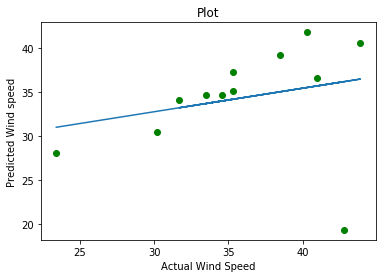

In [382]:
chg = df_cn.drop(['Station','Year','Month','Day'], axis =1)


X = chg.drop('Max Wind Speed (km/h)', axis = 1)
y = chg['Max Wind Speed (km/h)']

#scale features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

#Randomise the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 10)

from sklearn import linear_model
lm = linear_model.LinearRegression()

# TRAIN THE MODEL
lm.fit(X_train, y_train)

#Prediction
predictions = lm.predict(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is : ', metrics.mean_squared_error(y_test, predictions))
print('R2 MSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

slope, intercept, r, p, std_err = stats.linregress(y_test, predictions)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))

print(predictions)

print(y_test.sort_index())
# # SCATTERPLOT ACTUAL vs. PREDICTED
plt.scatter(y_test, predictions, color = 'g')
plt.plot(y_test, mymodel)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind speed')
plt.title('Plot');


In [385]:
print(predictions)

print(y_test.sort_index())

[28.11716205 30.49668256 37.26388746 34.68301954 34.73033676 19.37885788
 35.1357837  34.14603416 39.21796488 41.79362334 40.59002283 36.65746769]
1     40.3
2     34.6
5     35.3
6     41.0
7     30.2
12    35.3
13    31.7
14    23.4
18    38.5
20    42.8
22    43.9
26    33.5
Name: Max Wind Speed (km/h), dtype: float64


<h4>Challenges faced</h4>
<ul>
    <li>Data might not be accurate and it still need to be tune</li>
    <li>Implemented the 3 steps to get data -> data processing , modeling , validation(prediction ) </li>
    <li>Still unsure if it is the right model </li>
    <li>Data was not available in csv format for the past 10 days, data is only available in csv for the month before</li>
</ul>

<h4> Remarks </h4>
<ul>
    <ul>can use rnn and tensorflow based on my research to do lstm weather forecasting</ul>
</ul>    

<h1>Please note that codes below are not finalise and still in development</h1>

<class 'list'>


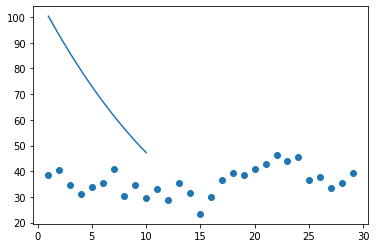

In [308]:
#Header input should be list
#Data header is predefined

#Prediction on daily Raifall
#Data Processing  

def extract(dataset , automated = True , header = []):
    if automated:
        data_header = ['Day','Mean Temperature (°C)','Maximum Temperature (°C)','Minimum Temperature (°C)','Mean Wind Speed (km/h)','Max Wind Speed (km/h)']
        dataset = dataset[data_header]
        return dataset
    else:
        data_header = dataset[header]
        return data_header

    
def listConversion(data):
    result = []
    for i in data:
         result.append(i[0])
    return result
    
# Extract inforation 
cn_temperature = extract(df_cn,automated=False, header = ['Mean Temperature (°C)'])
cn_rainfall = extract(df_cn,automated=False, header = ['Day','Daily Rainfall Total (mm)'])

#Get Max wind prediction - Single value 
cn_x = listConversion(np.array(extract(df_cn,automated=False, header = ['Max Wind Speed (km/h)'])))
cn_y = listConversion(np.array(extract(df_cn,automated=False, header = ['Day'])))



# # Check matrix 
# checkLinear(cn_y,cn_x)
slope, intercept, r, p, std_err = stats.linregress(cn_y, cn_x)
# print('%s , linear is not the best regression' % r)

print(type(cn_x))

model = np.poly1d(np.polyfit(cn_x,cn_y,3))
mline = np.linspace(1,10,30)


# def myfunc(x):
#   return slope * x + intercept

# mymodel = list(map(myfunc, cn_x))


# # #plot data
plt.scatter(cn_y,cn_x)
plt.plot(mline,model(mline))
plt.show()
# plt.plot(cn_y,mymodel)
# plt.show()
# plt.ylabel('Max Wind Speed (km/h)')
# plt.xlabel('Day In February')




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d1ba90>]],
      dtype=object)

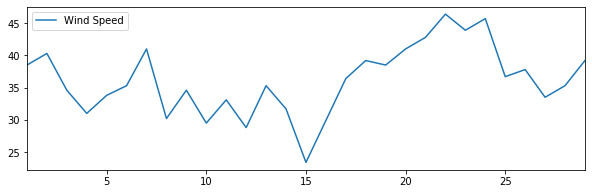

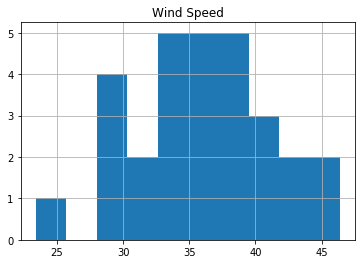

In [276]:
# Chart on wind speed for february 

# chart = pd.Dataframe({'Day':cn_y,'Wind Speed ' : cn_x }, inedx = header)
chart = pd.DataFrame({'Wind Speed': cn_x}, index= np.array(cn_y))
chart.plot(figsize=(10,3))
chart.hist()

In [307]:
#Classification method to check the prediction
X = df_cn.drop('Daily Rainfall Total (mm)' , axis = 1) 
y = df_cn['Daily Rainfall Total (mm)']

#calculate wind prediction with classification method -> Linear Regression and confusion metrics 

#Processing Data - Step 1
#Build model - Step 2 
#Vaidation - Step 3

In [145]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X)
data_scaled = pd.DataFrame(X_scaled, columns = X.columns)
data_scaled.head()

ValueError: could not convert string to float: 'Changi'